In [1]:
import findspark 
findspark.init()
findspark.find()
from pyspark.sql.types import IntegerType, FloatType ,DateType
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spark = SparkSession \
    .builder \
    .appName("pyspark1 ") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

### Task 1 

In [3]:
df = spark.read.csv("C:/Users/PC/Downloads/practiceDA.csv", header =True)
df= df.withColumn('Code', F.col('Code').cast(IntegerType()))\
        .withColumn('age', F.col('age').cast(IntegerType()))\
        .withColumn('year_of_school',F.col('year_of_school').cast(IntegerType()))\
        .withColumn('know_english', F.col('know_english').cast(IntegerType()))\
        .withColumn('know_france', F.col('know_france').cast(IntegerType()))\
        .withColumn('know_chinese', F.col('know_chinese').cast(IntegerType()))\
        .withColumn('income', F.col('income').cast(IntegerType()))\
        .withColumn('flight_status', F.col('flight_status').cast(IntegerType()))\
        .withColumn('professionally_staff', F.col('professionally_staff').cast(IntegerType()))\
        .withColumn('customer_service ', F.col('customer_service ').cast(IntegerType()))\
        .withColumn('diversity_product', F.col('diversity_product').cast(IntegerType()))\
        .withColumn('good_price', F.col('good_price').cast(IntegerType()))\
        .withColumn('easily_transaction', F.col('easily_transaction').cast(IntegerType()))\
        .withColumn('goodlooking_staff', F.col('goodlooking_staff').cast(IntegerType()))\
        .withColumn('diversity_flighttime', F.col('diversity_flighttime').cast(IntegerType()))\
        .withColumn('good_construction', F.col('good_construction').cast(IntegerType()))
df.agg({'income':'mean'}).show()

+-----------+
|avg(income)|
+-----------+
|   13859.62|
+-----------+



In [4]:
data = df.toPandas() 
data['income'].median()

11520.0

In [5]:
data['income'].mode()

0    12300
Name: income, dtype: int32

### Task 2 

Text(0.5, 1.0, 'Thu nhập trung bình từng khu vực')

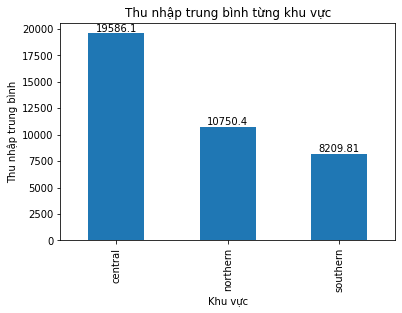

In [6]:
ax=data.groupby('area')['income'].mean().plot.bar()
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Thu nhập trung bình')
plt.xlabel('Khu vực')
plt.title('Thu nhập trung bình từng khu vực')

### Task 3 

In [7]:
df.filter((df['gender']=='male')&(df['job']=='officer')).agg({'year_of_school':'mean'}).show()

+-------------------+
|avg(year_of_school)|
+-------------------+
| 13.763157894736842|
+-------------------+



### Task 4 

In [8]:
female_area=df.filter(df['gender']=='female')
female_area.filter(female_area['area']=='northern').agg({'age':'mean'}).show()

+-----------------+
|         avg(age)|
+-----------------+
|62.96808510638298|
+-----------------+



In [9]:
female_area.filter(female_area['area']=='southern').agg({'age':'mean'}).show()

+--------+
|avg(age)|
+--------+
|  53.375|
+--------+



### Task 5 

In [10]:
df.orderBy('age').limit(150).agg({'age':'mean'}).show()

+------------------+
|          avg(age)|
+------------------+
|43.486666666666665|
+------------------+



### Task 6 

In [11]:
df.orderBy('age').limit(100).agg({'income':'mean'}).show()

+-----------+
|avg(income)|
+-----------+
|    10274.3|
+-----------+



### Task 7 

In [12]:
df.orderBy(df['income'].desc()).limit(50).agg({'year_of_school':'mean'}).show()

+-------------------+
|avg(year_of_school)|
+-------------------+
|              17.94|
+-------------------+



### Task 8 

In [13]:
df.groupby('degree').agg({'Code':'count'}).show()

+---------+-----------+
|   degree|count(Code)|
+---------+-----------+
|highshool|        257|
|   master|        114|
| bachelor|        129|
+---------+-----------+



### Task 9 

Text(0.5, 1.0, 'Tỷ trọng khách hàng theo nhóm tuổi và giới tính ')

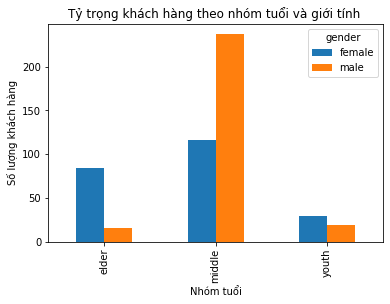

In [14]:
data.pivot_table(values='Code',columns='gender',index='age_group',aggfunc="count").plot.bar()
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng khách hàng')
plt.title('Tỷ trọng khách hàng theo nhóm tuổi và giới tính ')